In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import globalETAS
import global_etas_auto
import os
import pylab as plt
import multiprocessing as mpp
import datetime as dtm
import matplotlib.dates as mpd
import pytz




begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-06 13:41:13.366140+00:00
fetch and process catalog.
etas_prams:  {'lats': [-39.9, -35.4], 'fit_factor': 1.0, 'q': 1.5, 'b2': 1.5, 'do_recarray': True, 'mc': 2.5, 'dmstar': 1.0, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 9, 4, 13, 41, 13, 366140, tzinfo=<UTC>)], 'd_tau': 2.28, 'D_fract': 1.5, 'd_lambda': 1.76, 'lons': [176.55, 181.05], 'p': 1.1, 'incat': None, 'b1': 1.0}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7f0624b193c8>


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1708: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 2425], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1012]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-06 13:41:13.366140+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2425], [0, 1012])
etas_mpp worker xyz_range:  [1012, 2025]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-09-06 13:41:13.366140+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 2425], [1012, 2025])
begin make_etas_rtree()
begin make_etas_rtree()
len(local_lattice_dict):  1013
len(local_lattice_dict):  1012
now gather sub-arrays...
Indices initiated. begin ETAS ::  [0, 2425]
Indices initiated. begin ETAS ::  [0, 2425]


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:919: RuntimeWarning: divide by zero encountered in double_scalars
  self.ab_ratio_raw = math.sqrt(abs(max(self.e_vals)/min(self.e_vals)))
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max((abs(e_vals[0]/e_vals[1]), abs(e_vals[1]/e_vals[0])))))**(.5*ab_ratio_expon)
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:919: RuntimeWarning: divide by zero encountered in double_scalars
  self.ab_ratio_raw = math.sqrt(abs(max(self.e_vals)/min(self.e_vals)))
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.

finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 2425])
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 2425])
ETAS complete.


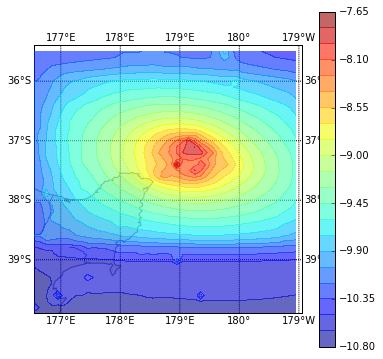

In [61]:
### 
#etas = global_etas_auto.auto_etas(dt_0=6, lon_center=179.055, lat_center=-37.401, d_lat_0=3., d_lon_0=3., fnameroot='etas_auto_global_2016_09_01',
#                                   kmldir='/home/myoder/Dropbox/Research/etas/etas_auto_2016_09_01',
#                                   to_dt=dtm.datetime(2016,8,31, tzinfo=pytz.timezone('UTC')))

# New Zealand
d_lat=2.
d_lon=2.
ev_lon, ev_lat = (179.05, -37.4)
t_now = dtm.datetime.now(pytz.timezone('UTC'))

etas = globalETAS.ETAS_mpp(n_cpu=mpp.cpu_count(), lats=[ev_lat-d_lat-.5, ev_lat+d_lat], lons=[ev_lon-d_lon-.5, ev_lon+d_lon], mc=2.5,
                           transform_ratio_max=5., etas_range_factor=10.0, etas_range_padding=.5, t_now=t_now)

etas.make_etas_contour_map(fignum=0, n_contours=25)
#
# get mainshock:
for ev in reversed(etas.catalog):
    if ev['mag']>7.:
        nz_mainshock = ev
        break
x,y = etas.cm(nz_mainshock['lon'], nz_mainshock['lat'])
etas.cm.scatter([x], [y], marker='o', edgecolor='b', fillcolor='none', s=100)

In [62]:


out_path = '/home/myoder/Dropbox/Research/etas/new_zealand_2016/nz_{}'.format(t_now)
out_fname = 'new_zealand_2016_{}'.format(t_now)
if not os.path.isdir(out_path): os.makedirs(out_path)

etas.export_kml(os.path.join(out_path, '{}.kml'.format(out_fname)))
etas.export_xyz(os.path.join(out_path, '{}.xyz'.format(out_fname)))
plt.savefig((os.path.join(out_path, '{}.png'.format(out_fname))))

kml bottom, top:  0 21


In [63]:
#2016-09-03 12:02:44 (UTC)
# 36.429°N 96.923°W

d_lat=4.
d_lon=4.
ev_lon, ev_lat = (-96.923, 36.431)
t_now = dtm.datetime.now(pytz.timezone('UTC'))


etas_us = globalETAS.ETAS_mpp(n_cpu=2*mpp.cpu_count(), lats=[ev_lat-d_lat, ev_lat+d_lat], lons=[ev_lon-d_lon, ev_lon+d_lon], mc=2.5,
                           transform_ratio_max=5., etas_range_factor=15.0, etas_range_padding=2.5, t_now=t_now,
                              cat_len=3650)



begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (3650.000000) = 2006-09-07 13:49:14.841857+00:00
fetch and process catalog.
etas_prams:  {'lats': [32.431, 40.431], 'fit_factor': 1.0, 'q': 1.5, 'b2': 1.5, 'do_recarray': True, 'mc': 2.5, 'dmstar': 1.0, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 9, 4, 13, 49, 14, 841857, tzinfo=<UTC>)], 'd_tau': 2.28, 'D_fract': 1.5, 'd_lambda': 1.76, 'lons': [-100.923, -92.923], 'p': 1.1, 'incat': None, 'b1': 1.0}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7f06244f9438>


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1708: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 7022], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1600]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (3650.000000) = 2006-09-07 13:49:14.841857+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 7022], [0, 1600])
etas_mpp worker xyz_range:  [1600, 3200]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (3650.000000) = 2006-09-07 13:49:14.841857+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 7022], [1600, 3200])
etas_mpp worker xyz_range:  [3200, 4800]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (3650.000000) = 2006-09-07 13:49:14.841857+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 7022], [3200, 4800])
etas_mpp worker xyz_range:  [4800, 6400]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using c

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: invalid value encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: invalid value encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: invalid value encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: invalid value encountered in double_scalars
  ab_rat

finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 7022])


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:919: RuntimeWarning: divide by zero encountered in double_scalars
  self.ab_ratio_raw = math.sqrt(abs(max(self.e_vals)/min(self.e_vals)))
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max((abs(e_vals[0]/e_vals[1]), abs(e_vals[1]/e_vals[0])))))**(.5*ab_ratio_expon)


finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 7022])


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:919: RuntimeWarning: divide by zero encountered in double_scalars
  self.ab_ratio_raw = math.sqrt(abs(max(self.e_vals)/min(self.e_vals)))
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:984: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max(e_vals[0]/e_vals[1], e_vals[1]/e_vals[0]))**ab_ratio_expon)	# note: this **.5 on the e0/e1 value is quasi-arbitrary.
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  ab_ratio = min(transform_ratio_max, (max((abs(e_vals[0]/e_vals[1]), abs(e_vals[1]/e_vals[0])))))**(.5*ab_ratio_expon)
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:919: RuntimeWarning: divide by zero encountered in double_scalars
  self.ab_ratio_raw = math.sqrt(abs(max(self.e_vals)/min(self.e_vals)))
/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.

finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 7022])
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 7022])
ETAS complete.


kml bottom, top:  0 26


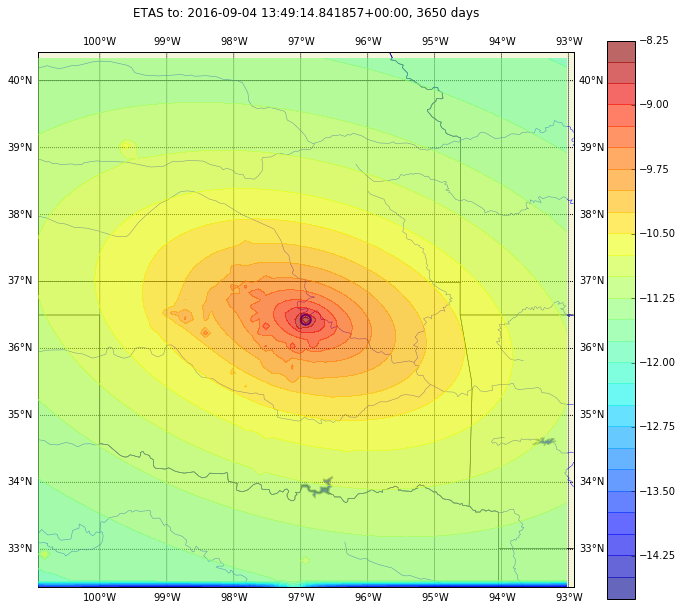

In [80]:

out_path = '/home/myoder/Dropbox/Research/etas/us_OK_2016/OK_{}'.format(etas_us.t_now)
out_fname = 'us_ok_2016_{}'.format(etas_us.t_now)
if not os.path.isdir(out_path): os.makedirs(out_path)

fg = plt.figure(0, figsize=(12,10))
etas_us.make_etas_contour_map(fignum=0, n_contours=25)

x,y = etas_us.cm(-96.923, 36.429)
etas_us.cm.scatter([x], [y], latlon=False, marker='o', facecolor='none', edgecolor='b', s=100, lw=2.)

plt.title('ETAS to: {}, {} days\n\n'.format(etas_us.t_now, etas_us.cat_len))

etas_us.export_kml(os.path.join(out_path, '{}.kml'.format(out_fname)))
etas_us.export_xyz(os.path.join(out_path, '{}.xyz'.format(out_fname)))
fg.savefig((os.path.join(out_path, '{}.png'.format(out_fname))))

In [81]:
for rw in etas_us.catalog:
    if rw['mag']>5.0: print(rw)

(datetime.datetime(2011, 11, 6, 3, 53, 10), 35.532, -96.765, 5.7, 5.2, 734447.1619212963, 12.302687708123818, 40.38350229842041, 0.001985765701617934, 3.715352290971728, 3.854243606223611, 0.05513229660491453, 1.0, 1.1, 1.5, array([  9.12533137e+07,   2.90686640e+01]), array([[ 0.9112479 ,  0.41185831],
       [-0.41185831,  0.9112479 ]]), 129.0)
(datetime.datetime(2016, 2, 13, 17, 7, 6, 270000), 36.4905, -98.7056, 5.1, 8.02, 736007.7132670139, 6.165950018614819, 9.190662918649181, 0.01657129988528023, 1.8620871366628675, 0.7690227020207712, 0.25787312541987456, 1.0, 1.1, 1.5, array([  9.28863866e+07,   1.35733870e+01]), array([[ 0.90830977,  0.41829817],
       [-0.41829817,  0.90830977]]), 277.0)
(datetime.datetime(2016, 9, 3, 12, 2, 44, 560000), 36.4307, -96.931, 5.6, 4.54, 736210.5019046296, 10.964781961431845, 31.554486979880263, 0.002828130424008033, 3.311311214825911, 2.9462696629929894, 0.07129724533160697, 1.0, 1.1, 1.5, array([  9.13304699e+07,   3.42471091e+01]), array([[ 0.

lats:  32.4429 40.406
lons:  -100.916 -93.022
mags:  2.5 5.7


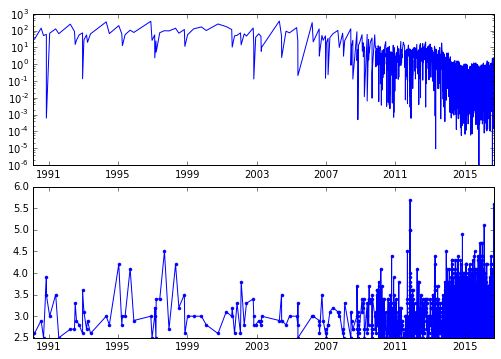

In [82]:
print('lats: ', min(etas_us.catalog['lat']), max(etas_us.catalog['lat']))
print('lons: ', min(etas_us.catalog['lon']), max(etas_us.catalog['lon']))
print('mags: ', min(etas_us.catalog['mag']), max(etas_us.catalog['mag']))

fg = plt.figure(figsize=(8,6))
ax_u = fg.add_axes([.1,.5,.8,.35]) 
ax_l = fg.add_axes([.1,.1,.8,.35], sharex=ax_u)
#
ax_u.set_yscale('log')
#
ax_l.plot(etas_us.catalog['event_date'].astype(dtm.datetime), etas_us.catalog['mag'], '.-' )
f_dts = mpd.date2num(etas_us.catalog['event_date'].astype(dtm.datetime))
dts = [x-f_dts[j] for j,x in enumerate(f_dts[1:])]
ax_u.plot(etas_us.catalog['event_date'].astype(dtm.datetime)[1:], dts)


In [67]:
#etas_us2 = global_etas_auto.auto_etas(lat_center = -95., lon_center=40., d_lat=_0=30., d_lon_0=15.)

import ANSStools

CC = ANSStools.catfromANSS(lat=[32.4, 40.4], lon=[-120., 60.], minMag=4.5,
                           dates0=[dtm.datetime(2016,8,1, tzinfo=pytz.timezone('UTC')), dtm.datetime.now(pytz.timezone('UTC')) ])


data handle fetched...
 no file.


In [68]:
len(CC)

5

In [69]:
print(CC)

[ (datetime.datetime(2016, 8, 1, 4, 46, 34, 530000), 39.9542, 47.976, 5.0, 16.0, 736177.1990107639)
 (datetime.datetime(2016, 8, 7, 18, 4, 41, 940000), 39.8715, -29.4879, 4.8, 19.66, 736183.7532631945)
 (datetime.datetime(2016, 8, 11, 9, 24, 28, 310000), 36.5778, -12.5912, 4.7, 10.0, 736187.3919943287)
 (datetime.datetime(2016, 8, 28, 9, 55, 1, 950000), 38.4846, -34.964, 5.0, 16.73, 736204.4132170139)
 (datetime.datetime(2016, 9, 3, 12, 2, 44, 560000), 36.4307, -96.931, 5.6, 4.54, 736210.5019046296)]


In [70]:
etas_us2 = globalETAS.ETAS_mpp(n_cpu=mpp.cpu_count(), lats=[ev_lat-d_lat, ev_lat+d_lat], lons=[ev_lon-d_lon, ev_lon+d_lon],
                              mc=4.5,
                           transform_ratio_max=5., etas_range_factor=15.0, etas_range_padding=1., t_now=t_now, cat_len=10)


begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (10.000000) = 2016-08-25 13:49:14.841857+00:00
fetch and process catalog.
etas_prams:  {'lats': [32.431, 40.431], 'fit_factor': 1.0, 'q': 1.5, 'b2': 1.5, 'do_recarray': True, 'mc': 4.5, 'dmstar': 1.0, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 9, 4, 13, 49, 14, 841857, tzinfo=<UTC>)], 'd_tau': 2.28, 'D_fract': 1.5, 'd_lambda': 1.76, 'lons': [-100.923, -92.923], 'p': 1.1, 'incat': None, 'b1': 1.0}
data handle fetched...
 no file.


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1708: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


R:  <multiprocessing.pool.ApplyResult object at 0x7f0624c6a860>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 13], None)
make_etas():
etas_mpp worker xyz_range:  [0, 3200]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (10.000000) = 2016-08-25 13:49:14.841857+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 13], [0, 3200])
etas_mpp worker xyz_range:  [3200, 6400]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (10.000000) = 2016-08-25 13:49:14.841857+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 13], [3200, 6400])
begin make_etas_rtree()
begin make_etas_rtree()
len(local_lattice_dict):  3200
len(local_lattice_dict):  3200
now gather sub-arrays...
Indices initiated. begin ETAS ::  [0, 13]
Indices initiated. begin ETAS ::  [0, 13]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree r

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:308: RuntimeWarning: divide by zero encountered in log10
  etas_contours = plt.contourf(X,Y, numpy.log10(self.lattice_sites), n_contours, zorder=8, alpha=alpha, cmap=map_cmap)


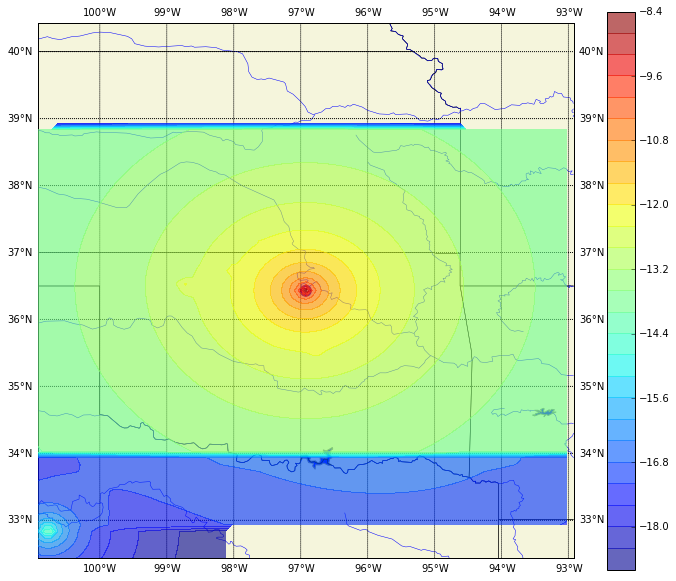

In [83]:
fg=plt.figure(0, figsize=(12,10))
etas_us2.make_etas_contour_map(fignum=0, n_contours=25)

#y = 36.429
#x = -96.923
x,y = etas_us2.cm(-96.923, 36.429)
etas_us2.cm.scatter([x], [y], latlon=False, marker='o', facecolor='none', edgecolor='b', s=100, lw=2.)